In [1]:
import time
import numpy as np
from matplotlib import pyplot as plt
from init_mcmc_multi_state import init_mcmc
from trace_simulators import simulate_traces
from mcmc_helper_functions import *

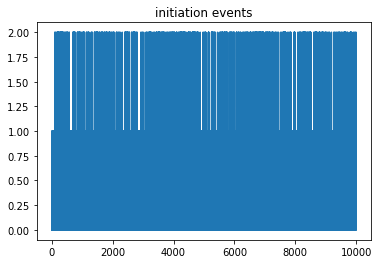

In [2]:
# transition and emission arrays
A = np.array([[.9, .3, 0],
              [.1, .5, .5],
              [0, .2, .5]])

E = np.array([[.9,.1,0],
              [.1,.8,.2],
              [0,.1,.8]])

# basic trace parameters
memory = 7*10 # number of time steps for Pol II to teranscribe gene
dT = 20 # time resolution of experimental data
tau = 2 # minimum time scale of the system
cv_factor = int(dT/tau)
# Fix trace length for now
trace_len = 1000 # length of simulated trace (time steps)
# Number of traces per batch
sigma = 20 # stdev of Gaussian noise
r = 20 
alpha = 14
# set priors
a_prior = np.ones((3, 3))
e_prior = np.ones((3, 3))
pi0_prior = np.ones((3))

# simulate initiation events
fluo_noise, fluo_raw, fluo_unif, system_states, initiation_states = \
simulate_traces(tau,dT,memory,trace_len,A,E,r,sigma,alpha)

init_vec = initiation_states.astype(int)
# plot
fig2, ax2 = plt.subplots()
ax2.set_title("initiation events")
ax2.plot(initiation_states)

## test particle filter

In [7]:
start = time.time()
particle_array, a_counts, e_counts, p_counts = particle_filter(init_vec, A, E, [.5, .2,.3], 10)
print(time.time()-start)

0.9155511856079102


In [4]:
start = time.time()
alpha_array = fwd_algorithm(init_vec, np.log(A),np.log(E), np.log([.5, .2, .3]))
print(time.time()-start)

C:\Users\nlamm\projects\network_decoder\venv\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


0.20443964004516602
0.4607675075531006
